In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_curve
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\jgond_000\Anaconda3\envs\data-x\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
df = pd.read_pickle('binary_df')
#df.drop(['I-E'], axis = 1, inplace=True)
df.to_csv('binary.csv')

In [3]:
# create groups of tags. delete pepole tags all together
art_tags = ['Art', 'Collage', 'Modern Art', 'Logo', 'Collage', 'Drawing', 'Trademark', 'Painting', 'Performer', 'Sketch']
people_tags = ['Person', 'Human', 'People']
music_tags = ['Musical Instrument', 'Guitar', 'Musician', 'Music Band', 'Guitarist', 'Electric Guitar']
child_tags = ['Child', 'Kid', 'Baby', 'Newborn']
hat_tags = ['Hat', 'Cap', 'Beanie', 'Sun Hat', 'Cowboy Hat', 'Headband']
exercise_tags = ['Sport', 'Fitness', 'Exercise', 'Working Out']
flower_tags = ['Flower', 'Blossom', 'Flora', 'Flower Arrangement', 'Flower Bouquet', 'Rose', 'Floral Design']
jacket_tags = ['Overcoat','Coat','Jacket']
water_tags = ['Water','Sea','Coast','Beach','Swimwear','Pool','Watercraft','Sea Life','Swimming']
vehicle_tags = ['Vehicle','Car','Automobile','Motorcycle','Motor','Sports Car']
furniture_tags = ['Furniture', 'Couch', 'Chair', 'Home Decor']
vegetation_tags = ['Vegetable', 'Squash', 'Vegetation', 'Soil', 'Plant', 'Potted Plant']
suit_tags = ['Suit','Tuxedo','Blazer']
female_tags = ['Female','Woman','Girl','Maillot','Bikini']
flyer_tags = ['Poster','Flyer','Brochure']
animal_tags = ['Animal','Mammal','Pet','Canine','Dog','Cat','Horse','Bird','Ball','Terrier','Hound']

df['Art_group'] = df[art_tags].sum(axis = 1)
#over_500_df['People_group'] = over_500_df[people_tags].sum(axis = 1)
df['Music_group'] = df[music_tags].sum(axis = 1)
df['Child_group'] = df[child_tags].sum(axis = 1)
df['Hat_group'] = df[hat_tags].sum(axis = 1)
df['Exercise_group'] = df[exercise_tags].sum(axis = 1)
df['Flower_group'] = df[flower_tags].sum(axis = 1)
df['Jacket_group'] = df[jacket_tags].sum(axis = 1)
df['Water_group'] = df[water_tags].sum(axis = 1)
df['Vehicle_group'] = df[vehicle_tags].sum(axis = 1)
df['Furniture_group'] = df[furniture_tags].sum(axis = 1)
df['Vegetation_group'] = df[vegetation_tags].sum(axis = 1)
df['Suit_group'] = df[suit_tags].sum(axis = 1)
df['Female_group'] = df[female_tags].sum(axis = 1)
df['Flyer_group'] = df[flyer_tags].sum(axis = 1)
df['Animal_group'] = df[animal_tags].sum(axis = 1)

In [4]:
# drop groups in group_tags
group_list = [art_tags, people_tags, music_tags, child_tags, hat_tags, exercise_tags, flower_tags, jacket_tags, water_tags, \
             vehicle_tags, furniture_tags, vegetation_tags, suit_tags, female_tags, flyer_tags, animal_tags]

for groups in group_list:
    df.drop(groups, axis = 1, inplace = True)

In [5]:
# dictionary with count of each tag 
tag_list = list(df.columns.values)

tag_count = {}
for col in tag_list:
    tag_count[col] = df[df[col] > 0].shape[0]
    
# print tags that have been used over x times
over_500_list = []
for key, value in tag_count.items():
    if value > 105:
        over_500_list.append(key)

In [6]:
# change all >1 to 1

for i in tag_list:
    df.loc[df[i] > 1, i] = 1

In [7]:
over_500_df = df[over_500_list].copy()

In [8]:
def model_fit(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    train_acc = round(model.score(X_train, y_train) * 100, 5)
    test_acc = round(model.score(X_test, y_test) * 100, 5)
    
    print('Train accuracy: ', train_acc, '\nTest accuracy: ', test_acc)

In [9]:
from sklearn.model_selection import train_test_split

X_var = over_500_df

In [10]:
#read in pickle with MB personality types and cut for specific personality attributes, e.g. I vs E

y_var = pd.read_pickle('y_var')
y_var = y_var.to_frame(name = 'MB')

for i in range(0, len(y_var['MB'])):
    y_var.loc[i,'I-E'] = y_var.loc[i,'MB'][0]
    y_var.loc[i,'S-N'] = y_var.loc[i,'MB'][1]
    y_var.loc[i,'T-F'] = y_var.loc[i,'MB'][2]
    y_var.loc[i,'J-P'] = y_var.loc[i,'MB'][3]
    
y_var_I_E = y_var['I-E']
y_var_S_N = y_var['S-N']
y_var_T_F = y_var['T-F']
y_var_J_P = y_var['J-P']

In [809]:
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var_S_N, test_size = .2, random_state = 14)

In [810]:
model_fit(AdaBoostClassifier(), X_train, X_test, y_train, y_test)

Train accuracy:  54.4147 
Test accuracy:  55.12175


In [847]:
# from sklearn.ensemble import VotingClassifier

votingC = VotingClassifier(estimators=[('ada', AdaBoostClassifier()), \
                                       ('logreg', LogisticRegression()), \
                                       ('rf', RandomForestClassifier())], voting='soft')

votingC = votingC.fit(X_train, y_train)
print(votingC.score(X_test,y_test))

0.550797649034


In [812]:
model_fit(LogisticRegression(penalty = 'l2', C = 10), X_train, X_test, y_train, y_test)

Train accuracy:  54.35171 
Test accuracy:  55.24769


In [880]:
model_fit(KNeighborsClassifier(n_neighbors = 10), X_train, X_test, y_train, y_test)

Train accuracy:  51.50656 
Test accuracy:  49.74811


In [895]:
model_fit(RandomForestClassifier(bootstrap = False, criterion = 'gini', max_depth = None, max_features = 1, \
                                 min_samples_leaf = 15, min_samples_split = 2, n_estimators = 300), \
          X_train, X_test, y_train, y_test)

Train accuracy:  54.30971 
Test accuracy:  55.58354


In [884]:
model_fit(xgb.XGBClassifier(), X_train, X_test, y_train, y_test)

Train accuracy:  54.83465 
Test accuracy:  54.9958


In [815]:
model_fit(GradientBoostingClassifier(), X_train, X_test, y_train, y_test)

Train accuracy:  55.2231 
Test accuracy:  55.49958


In [850]:
model_fit(ExtraTreesClassifier(bootstrap = True, criterion = 'gini', max_depth = None, max_features = 1, min_samples_leaf = 5, min_samples_split = 4, n_estimators = 1000), X_train, X_test, y_train, y_test)

Train accuracy:  54.51969 
Test accuracy:  55.37364


In [882]:
model_fit(SVC(), X_train, X_test, y_train, y_test)

Train accuracy:  53.96325 
Test accuracy:  55.62552


In [862]:
def report(results, n_top=15):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [893]:
import time

kfold = StratifiedKFold(n_splits=10)

C_range = 10. ** np.arange(-3, 3)
gamma_range = 10. ** np.arange(-3, 3)

param_grid = dict(gamma=gamma_range, C=C_range) 

start_time = time.time()

grid_search_svc = GridSearchCV(SVC(), param_grid=param_grid, cv = 3)
grid_search_svc.fit(X_train, y_train)

time = time.time() - start_time
print("Hyperparameter tuning took {} seconds".format(time))

Hyperparameter tuning took 501.89562034606934 seconds


In [894]:
report(grid_search_svc.cv_results_)

Model with rank: 1
Mean validation score: 0.534 (std: 0.004)
Parameters: {'C': 1.0, 'gamma': 0.10000000000000001}

Model with rank: 2
Mean validation score: 0.534 (std: 0.003)
Parameters: {'C': 10.0, 'gamma': 0.01}

Model with rank: 2
Mean validation score: 0.534 (std: 0.003)
Parameters: {'C': 100.0, 'gamma': 0.001}

Model with rank: 4
Mean validation score: 0.534 (std: 0.000)
Parameters: {'C': 0.001, 'gamma': 0.001}

Model with rank: 4
Mean validation score: 0.534 (std: 0.000)
Parameters: {'C': 0.001, 'gamma': 0.01}

Model with rank: 4
Mean validation score: 0.534 (std: 0.000)
Parameters: {'C': 0.001, 'gamma': 0.10000000000000001}

Model with rank: 4
Mean validation score: 0.534 (std: 0.000)
Parameters: {'C': 0.001, 'gamma': 1.0}

Model with rank: 4
Mean validation score: 0.534 (std: 0.000)
Parameters: {'C': 0.001, 'gamma': 10.0}

Model with rank: 4
Mean validation score: 0.534 (std: 0.000)
Parameters: {'C': 0.001, 'gamma': 100.0}

Model with rank: 4
Mean validation score: 0.534 (std:

In [891]:
import time
kfold = StratifiedKFold(n_splits=10)
#clf = RandomForestClassifier(n_estimators=est, min_samples_split=min_samples)

random_forest = RandomForestClassifier()

param_grid = {"max_depth": [3, None],
              "max_features": [1,3,5,7,9],
              "min_samples_split": [2,3,4,5,6,7,8,9],
              "min_samples_leaf": [5,10,15,20,25],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"], 
              "n_estimators": [300], 
              "random_state": [1]}
            
start_time = time.time()
# run grid search
grid_search_rf = GridSearchCV(random_forest, param_grid=param_grid, cv = 10)
grid_search_rf.fit(X_train, y_train)

time = time.time() - start_time
print("Hyperparameter tuning took {} seconds".format(time))

Hyperparameter tuning took 18557.31766986847 seconds


In [892]:
report(grid_search_rf.cv_results_)

Model with rank: 1
Mean validation score: 0.535 (std: 0.008)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 15, 'min_samples_split': 2, 'n_estimators': 300, 'random_state': 1}

Model with rank: 1
Mean validation score: 0.535 (std: 0.008)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 15, 'min_samples_split': 3, 'n_estimators': 300, 'random_state': 1}

Model with rank: 1
Mean validation score: 0.535 (std: 0.008)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 15, 'min_samples_split': 4, 'n_estimators': 300, 'random_state': 1}

Model with rank: 1
Mean validation score: 0.535 (std: 0.008)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 15, 'min_samples_split': 5, 'n_estimators': 300, 'random_state': 1}

Model with rank: 1
Mean validati

In [848]:
def plot_model_var_imp( model , X_train , X_test, y_train, y_test ):
    
    model.fit(X_train,y_train)

    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X_test.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 15 ].plot( kind = 'barh', title = "Random Forest Feature Importance", figsize = (5,5) )
    print ('Test accuracy: ', model.score( X_test , y_test )*100)

Test accuracy:  55.3736356003


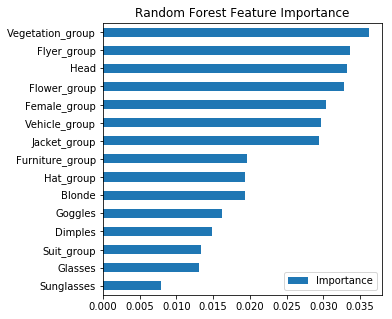

In [849]:
plot_model_var_imp(RandomForestClassifier(bootstrap = True, criterion = 'gini', max_depth = None, max_features = 1, \
                                          min_samples_leaf = 5, min_samples_split = 4, n_estimators = 1000, random_state = 1), \
                   X_train, X_test, y_train, y_test)

In [834]:
all_var = X_var.merge(y_var[['I-E','S-N','T-F','J-P']], how = 'inner', right_index = True, left_index = True)

# change all labels to 0,1 (with mapping '0-1') for correlation matrix. 
all_var.loc[all_var['I-E'] == 'I', 'I-E'] = 0
all_var.loc[all_var['I-E'] == 'E', 'I-E'] = 1

all_var.loc[all_var['S-N'] == 'S', 'S-N'] = 0
all_var.loc[all_var['S-N'] == 'N', 'S-N'] = 1

all_var.loc[all_var['T-F'] == 'T', 'T-F'] = 0
all_var.loc[all_var['T-F'] == 'F', 'T-F'] = 1

all_var.loc[all_var['J-P'] == 'J', 'J-P'] = 0
all_var.loc[all_var['J-P'] == 'P', 'J-P'] = 1

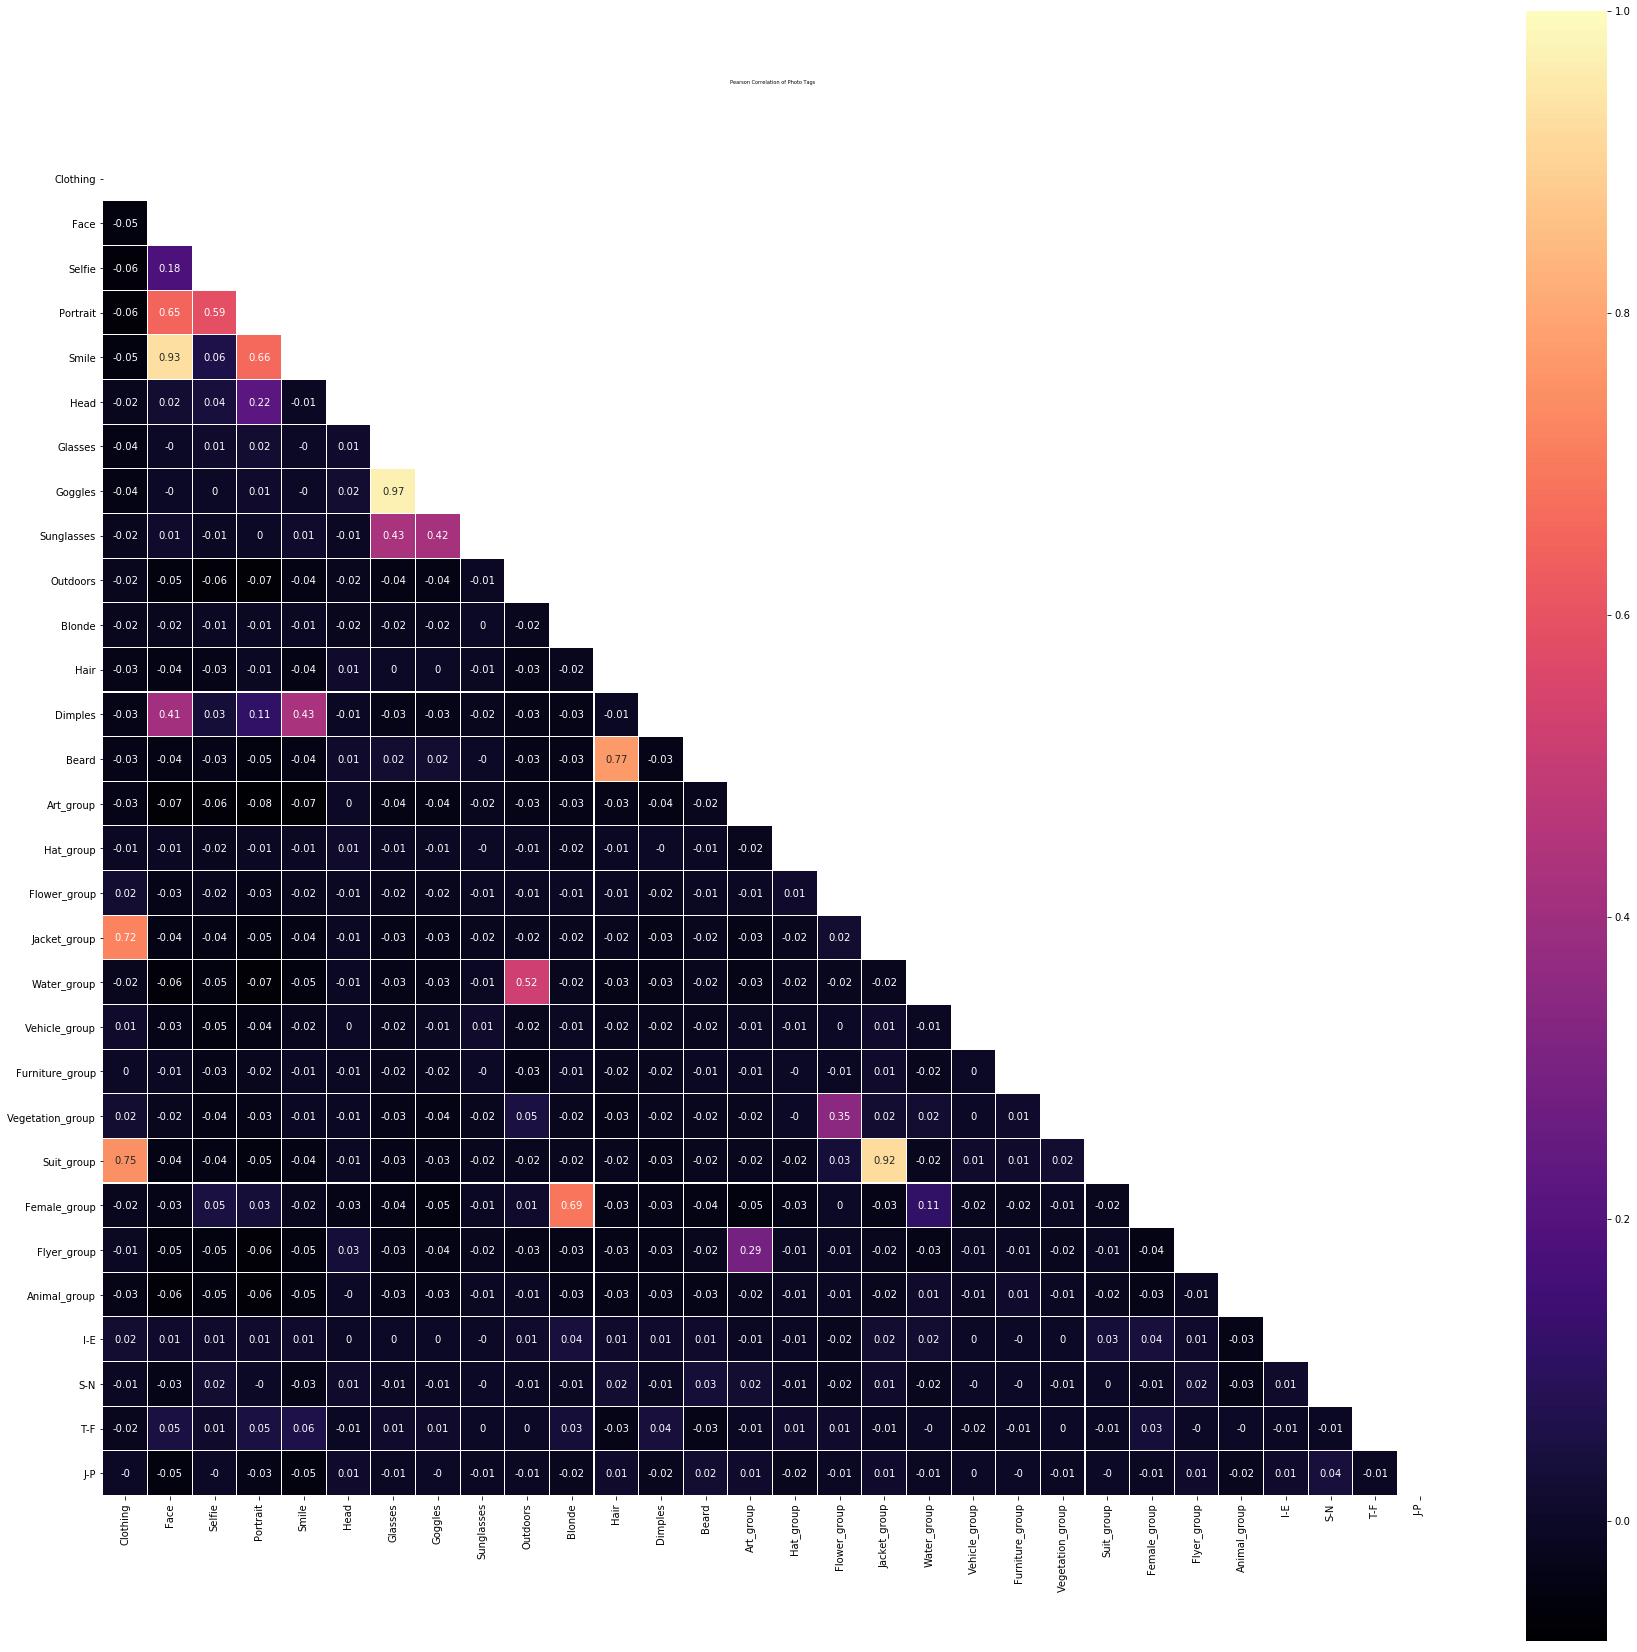

In [840]:
# Check correlation between features 

colormap = plt.cm.magma
plt.figure(figsize=(30,30))

plt.title('Pearson Correlation of Photo Tags', y=1.05, size=5)

corr = all_var.astype(float).corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool)

# mask upper diagonal of heatmap
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,\
            mask = mask, linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [910]:
all_var = X_var.copy()
all_var['I-E'] = y_var_I_E
E_var = all_var[all_var['I-E'] == 'E']
I_var = all_var[all_var['I-E'] == 'I']
I_var = I_var.drop(['I-E'], axis = 1)
E_var = E_var.drop(['I-E'], axis = 1)

In [911]:
I_var.head()

,Clothing,Face,Selfie,Portrait,Smile,Head,Glasses,Goggles,Sunglasses,Outdoors,...,Flower_group,Jacket_group,Water_group,Vehicle_group,Furniture_group,Vegetation_group,Suit_group,Female_group,Flyer_group,Animal_group
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1500,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [919]:
tag_list_IE = list(I_var.columns.values)
tag_count_I = {}
for col in tag_list_IE:
    tag_count_I[col] = I_var[I_var[col] > 0].shape[0]

In [920]:
sorted(tag_count_I.items(), key=lambda x: x[1])

[('Sunglasses', 64),
 ('Flower_group', 77),
 ('Hat_group', 83),
 ('Head', 92),
 ('Vehicle_group', 108),
 ('Suit_group', 115),
 ('Jacket_group', 119),
 ('Beard', 134),
 ('Furniture_group', 147),
 ('Water_group', 167),
 ('Outdoors', 178),
 ('Dimples', 189),
 ('Blonde', 191),
 ('Clothing', 217),
 ('Animal_group', 221),
 ('Flyer_group', 224),
 ('Hair', 226),
 ('Glasses', 316),
 ('Art_group', 327),
 ('Goggles', 332),
 ('Vegetation_group', 372),
 ('Female_group', 425),
 ('Selfie', 716),
 ('Smile', 914),
 ('Face', 1018),
 ('Portrait', 1384)]

In [921]:
tag_list_IE = list(E_var.columns.values)
tag_count_E = {}
for col in tag_list_IE:
    tag_count_E[col] = E_var[E_var[col] > 0].shape[0]

In [922]:
sorted(tag_count_E.items(), key=lambda x: x[1])

[('Flower_group', 49),
 ('Sunglasses', 55),
 ('Hat_group', 68),
 ('Head', 84),
 ('Vehicle_group', 102),
 ('Furniture_group', 130),
 ('Beard', 139),
 ('Jacket_group', 141),
 ('Animal_group', 142),
 ('Suit_group', 147),
 ('Outdoors', 176),
 ('Dimples', 195),
 ('Water_group', 196),
 ('Hair', 226),
 ('Flyer_group', 227),
 ('Clothing', 242),
 ('Blonde', 269),
 ('Art_group', 272),
 ('Glasses', 290),
 ('Goggles', 313),
 ('Vegetation_group', 348),
 ('Female_group', 503),
 ('Selfie', 677),
 ('Smile', 876),
 ('Face', 961),
 ('Portrait', 1312)]